In [1]:
import keras

Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [4]:
DR = pd.read_csv('./diabetic-retinopathy-resized/trainLabels_cropped.csv')
DR['image'] = DR['image'].apply(lambda x:'./diabetic-retinopathy-resized/resized_train_cropped/resized_train_cropped/' + x + '.jpeg')
DR = DR.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [6]:
(DR['level'].value_counts())/len(DR)

0    0.734932
2    0.150621
1    0.069443
3    0.024838
4    0.020166
Name: level, dtype: float64

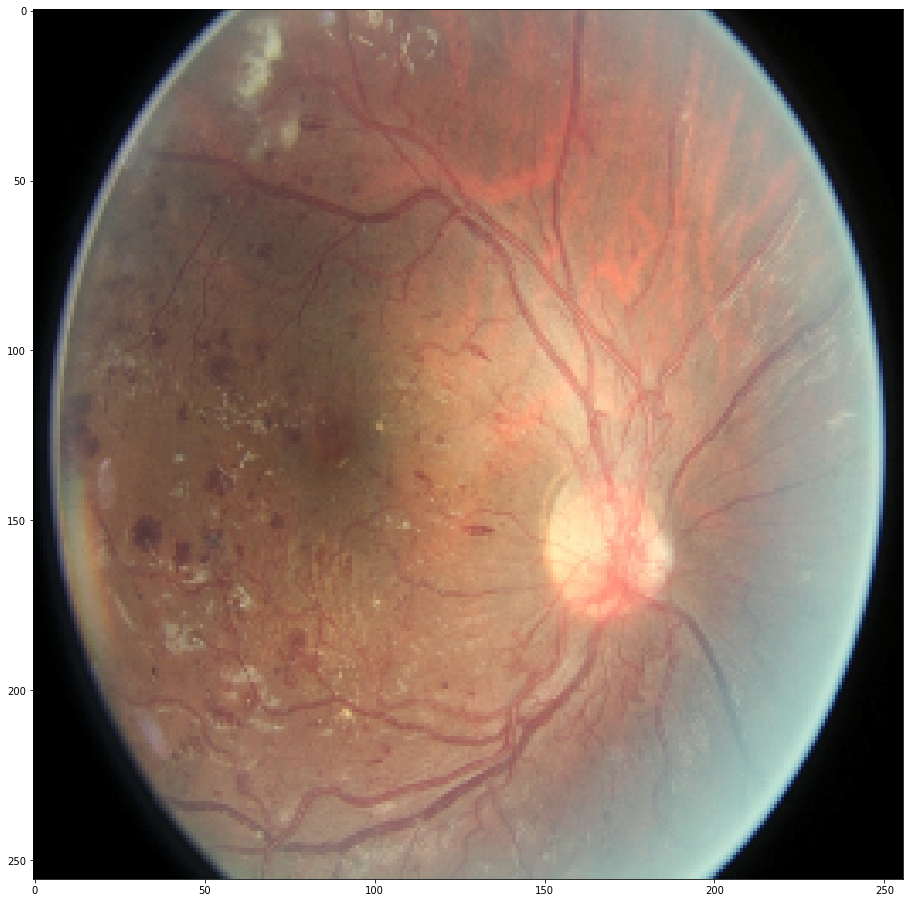

In [12]:
plt.figure(figsize=(20,16))
img = cv2.imread(DR['image'].iloc[6])[...,[2, 1, 0]]
res256 = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
res64 = cv2.resize(img, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
plt.imshow(res256)

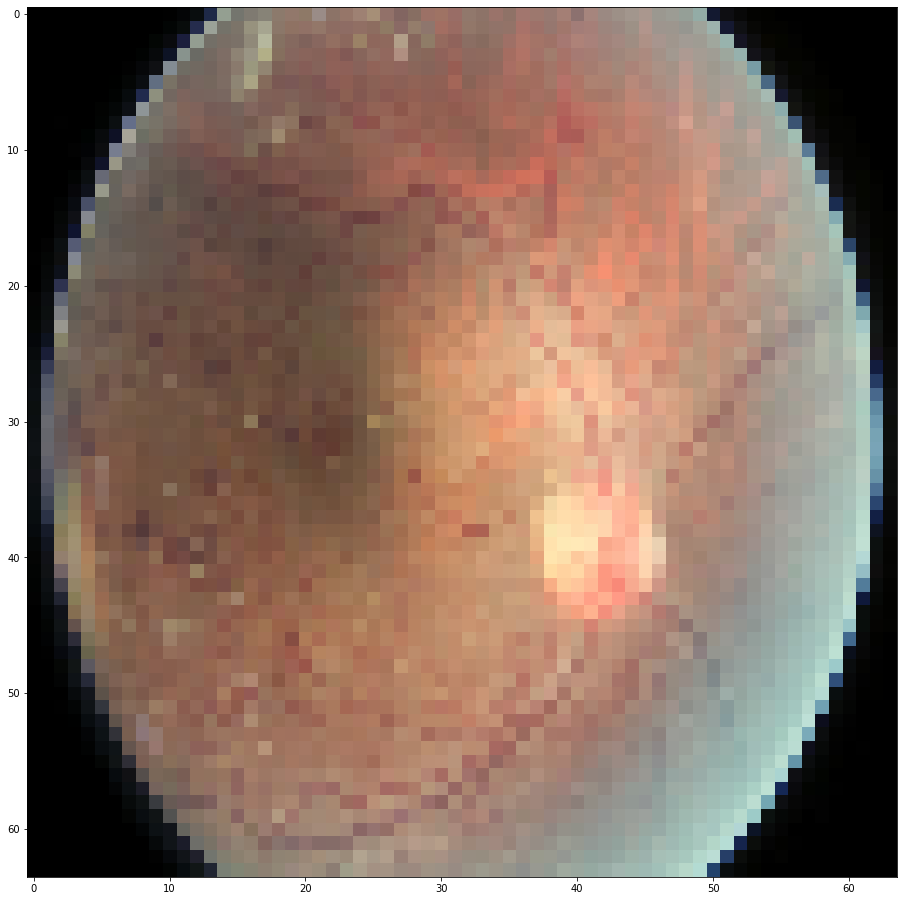

In [13]:
plt.figure(figsize=(20,16))
plt.imshow(res64)

In [8]:
diag_text = ['Normal', 'Mild', 'Moderate', 'Severe', 'Proliferative']
def display_raw_images(df, columns = 4, rows = 2):
    fig=plt.figure(figsize = (5 * columns, 4 * rows))
    for i in range(columns * rows):
        image_name = df.loc[i,'image']
        image_id = df.loc[i,'level']
        img = cv2.imread(image_name)[...,[2, 1, 0]]
        fig.add_subplot(rows, columns, i + 1)
        plt.title(diag_text[int(image_id)])
        plt.imshow(img)
    plt.tight_layout()

In [9]:
%matplotlib inline
display_raw_images(DR)

In [10]:
def loadImage(df):
    images = list()
    for i in range(len(df)):
            image_name = df.iloc[i]
            img = cv2.imread(image_name)
            res = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
            images.append(res)
    return images

In [11]:
X_train, X_test, y_train, y_test = train_test_split(DR['image'],DR['level'],test_size=0.20, random_state=42)

In [12]:
# y_test.value_counts()

In [ ]:
trainImages = loadImage(X_train)

In [ ]:
testImages = loadImage(X_test)

In [ ]:
trainImages = np.asarray(trainImages)
testImages = np.asarray(testImages)
print(trainImages.shape)
print(testImages.shape)


In [ ]:
from tempfile import TemporaryFile
outfile = TemporaryFile()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
np.save('trainImages.npy', trainImages)
np.save('testImages.npy', testImages)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print(outfile)

In [ ]:
type(y_train)

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers
from keras.utils import to_categorical

In [ ]:
plt.imshow(trainImages[0][...,[2, 1, 0]])